In [1]:
import tensorflow as tf
from tensorflow import keras

keras.__version__


'2.6.0'

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
y_train_full.shape

(60000,)

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
class_names[y_train[0]]

'Coat'

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation="softmax"))

2021-09-07 18:29:00.270912: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd", metrics=["accuracy"])


In [18]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6933 - accuracy: 0.7749 - val_loss: 0.4888 - val_accuracy: 0.8368
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4807 - accuracy: 0.8316 - val_loss: 0.4391 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4400 - accuracy: 0.8462 - val_loss: 0.4239 - val_accuracy: 0.8518
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4134 - accuracy: 0.8560 - val_loss: 0.3970 - val_accuracy: 0.8600
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3947 - accuracy: 0.8605 - val_loss: 0.3783 - val_accuracy: 0.8696
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3776 - accuracy: 0.8679 - val_loss: 0.5367 - val_accuracy: 0.7994
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3653 - accuracy: 0.8707 - val_loss: 0.3588 - val_accuracy:

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
history.history["accuracy"]

[0.7748727202415466,
 0.831636369228363,
 0.8462363481521606,
 0.856036365032196,
 0.8605454564094543,
 0.8678908944129944,
 0.8707273006439209,
 0.8752727508544922,
 0.8791454434394836,
 0.8813272714614868,
 0.8848545551300049,
 0.8863818049430847,
 0.8882181644439697,
 0.8922908902168274,
 0.8939999938011169,
 0.895763635635376,
 0.8984545469284058,
 0.9000727534294128,
 0.901272714138031,
 0.9028182029724121,
 0.9055818319320679,
 0.9072545170783997,
 0.9084363579750061,
 0.9100363850593567,
 0.9124181866645813,
 0.9138363599777222,
 0.9139090776443481,
 0.9164727330207825,
 0.9174727201461792,
 0.9185454249382019]

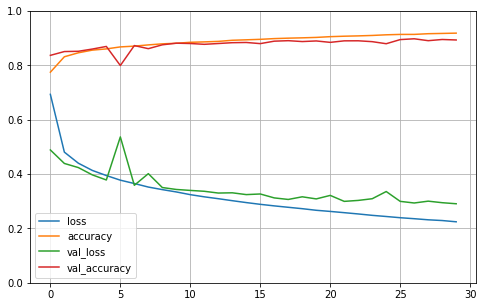

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 63.6769 - accuracy: 0.8485


[63.676856994628906, 0.8485000133514404]

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
y_pred = model.predict_classes(X_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding="same",
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

2021-09-13 17:21:09.502973: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

2021-09-13 17:21:51.386125: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


ValueError: in user code:

    /Users/aryansharma/opt/anaconda3/envs/deep_learning/lib/python3.8/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /Users/aryansharma/opt/anaconda3/envs/deep_learning/lib/python3.8/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/aryansharma/opt/anaconda3/envs/deep_learning/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/aryansharma/opt/anaconda3/envs/deep_learning/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/aryansharma/opt/anaconda3/envs/deep_learning/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/aryansharma/opt/anaconda3/envs/deep_learning/lib/python3.8/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /Users/aryansharma/opt/anaconda3/envs/deep_learning/lib/python3.8/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /Users/aryansharma/opt/anaconda3/envs/deep_learning/lib/python3.8/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/aryansharma/opt/anaconda3/envs/deep_learning/lib/python3.8/site-packages/keras/engine/input_spec.py:229 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 28)
